In [10]:
import pandas as pd 
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor



In [11]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Rohith\salary_prediction_data.csv")
df.head(10)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
5,PhD,19,Rural,Director,27,Female,156312.936208
6,PhD,4,Rural,Director,60,Female,130567.649455
7,PhD,13,Suburban,Director,49,Female,148707.740759
8,Bachelor,20,Urban,Engineer,25,Female,95945.275429
9,PhD,14,Urban,Analyst,58,Female,133339.389682


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [13]:
print(df.isna().sum())

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64


In [14]:
print(df.dropna())

       Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]


In [15]:
print(df.duplicated)

<bound method DataFrame.duplicated of        Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]>


In [16]:
df.drop_duplicates(inplace=True)

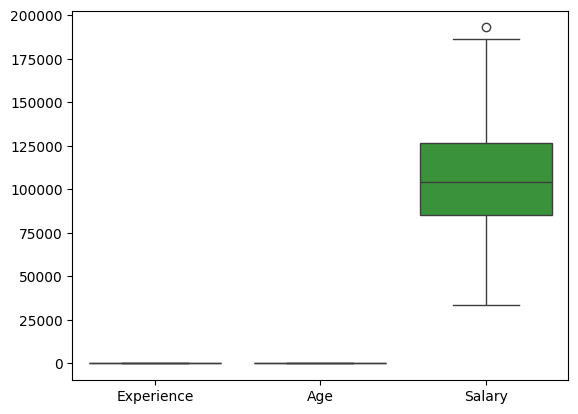

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.show()

            Experience       Age    Salary
Experience    1.000000  0.044296  0.341918
Age           0.044296  1.000000 -0.053174
Salary        0.341918 -0.053174  1.000000


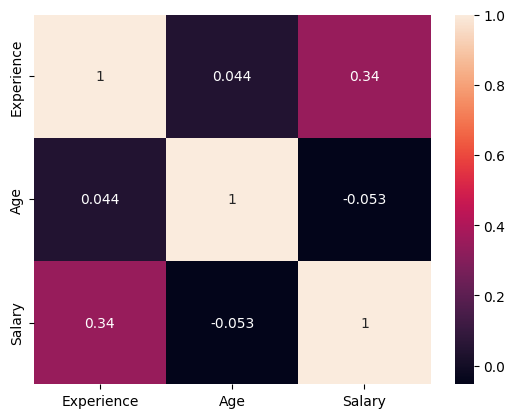

In [18]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [19]:
print(df.describe)

<bound method NDFrame.describe of        Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]>


In [20]:
print(df.std(numeric_only=True))

Experience        8.341111
Age              13.609412
Salary        28256.972075
dtype: float64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


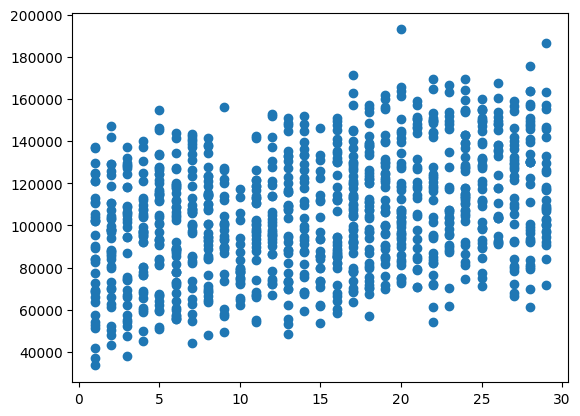

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')


In [22]:
x=df.iloc[:,:3].values
x=pd.DataFrame(x)
y=df["Salary"]
plt.scatter(df["Experience"],df["Salary"])
plt.show()
print(df.columns)

In [23]:
x=df[["Education","Job_Title","Experience","Location"]]
y=df["Salary"]

In [24]:

Column_transformer=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),["Education","Job_Title","Experience","Location"])],remainder="passthrough")


In [25]:
x=(Column_transformer.fit_transform(x))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [27]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3200 stored elements and shape (800, 40)>

In [28]:
y_train

687    111328.053354
500    144899.994609
332     92041.749991
979     70640.758770
817    123780.312351
           ...      
835    129845.553343
192    118732.879740
629     83719.555516
559    117228.524905
684     83849.983289
Name: Salary, Length: 800, dtype: float64

In [29]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 800 stored elements and shape (200, 40)>

In [30]:
y_test

993     98276.767603
859    117342.186715
298    135962.905626
553     92184.829258
672    133712.642696
           ...      
679     47721.516195
722     74842.434547
215     87148.822939
653    130676.708934
150     69022.972401
Name: Salary, Length: 200, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
X=imputer.fit_transform(x)

In [32]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
# y_pred=model.predict(x_test)
# (print(y_pred))
# accuracy1=r2_score(y_pred,y_test)
# print(accuracy1)
# model2=XGBRegressor()
# model2.fit(x_train,y_train)
y_pred=model.predict(x_test)
# accuracy2=r2_score(y_test,y_pred)
# print(accuracy2)



In [36]:
accuracy=r2_score(y_test,y_pred)*100
print(accuracy)

86.2428235180306


In [95]:
new_data=pd.DataFrame({"Education":["High School","PhD"],"Experience":[8,11],"Location":["Urban","Suburban"],"Job_Title":["Manager","Director"]})

In [96]:
processed_data=(Column_transformer.transform(new_data))
prediction=model.predict(processed_data)
print("predicted_salary:",prediction)

predicted_salary: [ 77918.89917395 141037.58051274]


In [ ]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,z_score
0,High School,8,Urban,Manager,63,Male,84620.053665,-0.740998
1,PhD,11,Suburban,Director,59,Male,142591.255894,1.310574
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,-0.274557
3,High School,29,Rural,Director,45,Male,96834.671282,-0.308729
4,PhD,25,Urban,Analyst,26,Female,132157.786175,0.941339
